In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.sparse
import scipy.stats
import os
import scipy.io as sio
%matplotlib inline
from pylab import *

# Plotting Params:
rc('mathtext', default='regular')
fsize=14

projectDIR = '../../'

In [3]:
import sys
sys.path.append(projectDIR + "code")
# import Dataset
import dnatools
from utils import find_pos, find_seq_diff_pos

## Process SMS scores

In [4]:
sms = pd.read_csv(projectDIR + 'data/mapsy/SMS_Supplemental_Table_S7.csv', header=None)
sms = sms[[0,1]]

In [5]:
sms.columns = ['mer', 'SMS_score']

In [6]:
sms_scores = sms.SMS_score

In [7]:
sms_scores.index = sms.mer

In [8]:
logit = lambda x: log(x)-log(1-x)
expit = lambda x: 1./(1.+exp(-x))

def score_seq(seq, mer_scores):
    score = 0.
    for b in range(len(seq)-7):
        score += mer_scores[seq[b:b+7]]
    return score

In [9]:
def make_predictions(df, label='DSCORE_PRED_Vivo'):
    pred_score = []
    for i in range(len(df)):
        mut_seq = df.Exon_ALT_SEQ[i]
        ref_seq = df.Exon_REF_SEQ[i]
        mut_score = score_seq(mut_seq, sms_scores)
        ref_score = score_seq(ref_seq, sms_scores)
        pred_score.append(mut_score-ref_score)
    df[label] = pred_score
    return df

## Load MaPSy data

In [11]:
dt = pd.read_csv(projectDIR+"/data/mapsy/CAGI_entire_file_testing_set_processed.txt")

In [12]:
dt['WT_Exon_End'] = dt.apply(lambda x: find_pos(x["WT_SEQ"], x["donor"]), axis=1)
dt['WT_Exon_Start'] = dt.apply(lambda x: find_pos(x["WT_SEQ"], x["acceptor"], start=False), axis=1)

GTAAGCCCTGCTAG
GTGTGATCCCAGGG
AGTAGATACTTAAAATACTTAGAATTTTTTTCTTCATTTTTCTCTTTAAG
GGATGGCAGATCCCTGAGACTTGGCTCTAATTCTGTCCTTAAAATGGCAG
TTTTTTTTCTTTTCTTTTCTTTTTTTTTTTTTTTTTTTGTCTTCTCCCAG


../../code/utils.py:20: UserWarning: Cannot match full length short sequence GTAAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../../code/utils.py:20: UserWarning: Cannot match full length short sequence GTGTG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../../code/utils.py:20: UserWarning: Cannot match full length short sequence ATTTTTCTCTTTAAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../../code/utils.py:20: UserWarning: Cannot match full length short sequence TCCTTAAAATGGCAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../../code/utils.py:20: UserWarning: Cannot match full length short sequence TTTGTCTTCTCCCAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % 

GATACGTGAGAATGTCATGAGGATCTAAAATATATTGCATACTTTTATAG
GATTTTCTTCCCAAAGAGTCAGACTTTAACAGAGTGCTTTTCTCCTACAG
CTTTGACACTTGAGTTATCTGGATTTGTCTTGTATTCTGTTTTCTCAAAG
GGTCCCGTAGTTATGTCTTGTAAATTAACTCTGTTCTTTCAATTCTTTAG


../../code/utils.py:20: UserWarning: Cannot match full length short sequence TGCATACTTTTATAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../../code/utils.py:20: UserWarning: Cannot match full length short sequence GCTTTTCTCCTACAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../../code/utils.py:20: UserWarning: Cannot match full length short sequence TCTGTTTTCTCAAAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../../code/utils.py:20: UserWarning: Cannot match full length short sequence CTTTCAATTCTTTAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)


In [13]:
dt['MUT_Exon_End'] = dt.apply(lambda x: find_pos(x["MUT_SEQ"], x["donor"]), axis=1)
dt['MUT_Exon_Start'] = dt.apply(lambda x: find_pos(x["MUT_SEQ"], x["acceptor"], start=False), axis=1)

GTAAGCCCTGCTAG
GTGTGATCCCAGGG
AGTAGATACTTAAAATACTTAGAATTTTTTTCTTCATTTTTCTCTTTAAG
GGATGGCAGATCCCTGAGACTTGGCTCTAATTCTGTCCTTAAAATGGCAG
TTTTTTTTCTTTTCTTTTCTTTTTTTTTTTTTTTTTTTGTCTTCTCCCAG
GATACGTGAGAATGTCATGAGGATCTAAAATATATTGCATACTTTTATAG
GATTTTCTTCCCAAAGAGTCAGACTTTAACAGAGTGCTTTTCTCCTACAG
CTTTGACACTTGAGTTATCTGGATTTGTCTTGTATTCTGTTTTCTCAAAG


../../code/utils.py:20: UserWarning: Cannot match full length short sequence GTAAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../../code/utils.py:20: UserWarning: Cannot match full length short sequence GTGTG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../../code/utils.py:20: UserWarning: Cannot match full length short sequence ATTTTTCTCTTTAAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../../code/utils.py:20: UserWarning: Cannot match full length short sequence TCCTTAAAATGGCAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)
../../code/utils.py:20: UserWarning: Cannot match full length short sequence TTTGTCTTCTCCCAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % 

GGTCCCGTAGTTATGTCTTGTAAATTAACTCTGTTCTTTCAATTCTTTAG


../../code/utils.py:20: UserWarning: Cannot match full length short sequence CTTTCAATTCTTTAG, used first 5 bases
  warnings.warn("Cannot match full length short sequence %s, used first 5 bases" % shortseq)


In [14]:
dt["MUT_POS"] = dt.apply(lambda x: find_seq_diff_pos(x["WT_SEQ"], x["MUT_SEQ"]), axis=1)

../../code/utils.py:36: MatplotlibDeprecationWarning: The find function was deprecated in version 2.2.
  return find(muts)[0]


In [15]:
dt['Exon_REF_SEQ'] = dt.apply(lambda x: x['WT_SEQ'][x['WT_Exon_Start'] : x['WT_Exon_End']], axis=1)
dt['Exon_ALT_SEQ'] = dt.apply(lambda x: x['MUT_SEQ'][x['MUT_Exon_Start'] : x['MUT_Exon_End']], axis=1)

## Appy HAL Model

In [16]:
dt = make_predictions(dt, label="DSCORE_PRED_Vivo")
dt = make_predictions(dt, label="DSCORE_PRED_Vitro")

In [18]:
answer = pd.read_csv(projectDIR+"/data/mapsy/MaPsyCAGI_entire_file_test_set_answers.txt", header=None, sep='\t')

In [19]:
answer = answer[[0, 1, 14, 15]]

In [20]:
answer.columns = ['WT_ID', 'MUT_ID', 'log2_vivo_ratio', 'log2_vitro_ratio']

In [21]:
answer['ID'] = answer.WT_ID + '_' + answer.MUT_ID

In [22]:
dt = dt.merge(answer, on='ID')

In [23]:
dt.columns

Index(['ID', 'WT_ID_x', 'MUT_ID_x', 'WT_SEQ', 'MUT_SEQ', 'Exon_Start',
       'Vivo_WT_Input', 'chr', 'Exon_End', 'Vivo_MUT_Input', 'Vitro_WT_Input',
       'Vitro_MUT_Input', 'donor', 'acceptor', 'strand', 'Exon_PhastCons',
       'acceptor_intronL', 'donor_intronL', 'Exon_eng', 'WT_Exon_End',
       'WT_Exon_Start', 'MUT_Exon_End', 'MUT_Exon_Start', 'MUT_POS',
       'Exon_REF_SEQ', 'Exon_ALT_SEQ', 'DSCORE_PRED_Vivo', 'DSCORE_PRED_Vitro',
       'WT_ID_y', 'MUT_ID_y', 'log2_vivo_ratio', 'log2_vitro_ratio'],
      dtype='object')

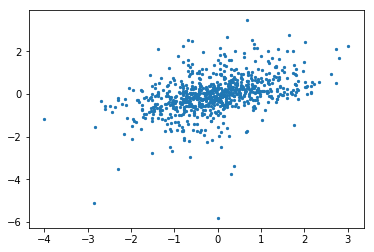

In [24]:
plt.scatter(dt['DSCORE_PRED_Vitro'], dt['log2_vitro_ratio'], s=5)
plt.show()

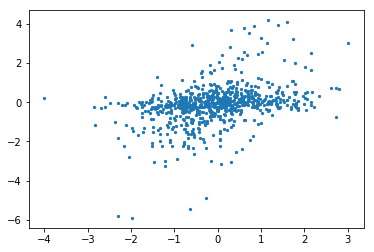

In [25]:
plt.scatter(dt['DSCORE_PRED_Vivo'], dt['log2_vivo_ratio'], s=5)
plt.show()

In [26]:
dt.to_csv(projectDIR + "data/mapsy/sms_Pred_test.csv")